In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler , MinMaxScaler, StandardScaler
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Input,Flatten,Conv1D,MaxPooling1D
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from keras.layers import LSTM
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, cross_val_score


## Random Under-Sampling With Evaluation

In [2]:
df= pd.read_csv('Heart Disease Data 2015.csv')
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [3]:
df.drop(['Income',"Education",'DiffWalk',"NoDocbcCost","AnyHealthcare",'Veggies',"Fruits","CholCheck"],axis=1,inplace=True)

df.shape
df['HeartDiseaseorAttack'].value_counts()


HeartDiseaseorAttack
0.0    229787
1.0     23893
Name: count, dtype: int64

In [4]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

## splite data

In [5]:
x = df.drop(["HeartDiseaseorAttack"] , axis = 1).values
y = df["HeartDiseaseorAttack"].values

In [6]:
rus = RandomUnderSampler(random_state=42)
x_rus, y_rus = rus.fit_resample(x, y)
x_train4, x_test4, y_train4, y_test4 = train_test_split(x_rus, y_rus, test_size=0.25, random_state=42)

In [7]:

scaler = MinMaxScaler()
x_train4 = scaler.fit_transform(x_train4)
x_test4 = scaler.transform(x_test4)
print(len(x_train4), len(y_train4))
print(len(x_test4), len(y_test4))

32131 32131
10711 10711


## Random forest

In [15]:


# Inicjalizacja modelu z domyślnymi parametrami
rf = RandomForestClassifier()

# Określenie siatki parametrów do przetestowania
param_grid = {
    'n_estimators': [100, 200, 300],  # Liczba drzew
    'max_depth': [10, 20, 30],        # Maksymalna głębokość drzewa
    'min_samples_split': [2, 4, 6],   # Minimalna liczba próbek wymagana do podziału węzła
    'min_samples_leaf': [1, 2, 4],    # Minimalna liczba próbek wymagana w liściu
    'max_features': ['auto', 'sqrt']  # Liczba cech do rozważenia przy każdym podziale
}

# Utworzenie obiektu GridSearchCV
cv_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

# Przeszukiwanie siatki parametrów
cv_rf.fit(x_train4, y_train4)

# Najlepszy zestaw parametrów
print("Najlepsze parametry: ", cv_rf.best_params_)

# Najlepszy estimator
best_rf = cv_rf.best_estimator_

# Predykcje i ocena modelu
ypred_train = best_rf.predict(x_train4)
ypred_test = best_rf.predict(x_test4)

print("Training Results\n")
print(classification_report(y_train4, ypred_train))
print("Testing Results\n")
print(classification_report(y_test4, ypred_test))


# # Ocena modelu za pomocą walidacji krzyżowej
# cross_val_scores = cross_val_score(best_rf, x_train4, y_train4, cv=5)
# print("Cross-validation scores:", cross_val_scores)
# print("Average cross-validation score:", np.mean(cross_val_scores))

Najlepsze parametry:  {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 200}
Training Results

              precision    recall  f1-score   support

         0.0       0.81      0.71      0.75     16021
         1.0       0.74      0.83      0.78     16110

    accuracy                           0.77     32131
   macro avg       0.77      0.77      0.77     32131
weighted avg       0.77      0.77      0.77     32131

Testing Results

              precision    recall  f1-score   support

         0.0       0.78      0.69      0.73      5400
         1.0       0.72      0.80      0.76      5311

    accuracy                           0.74     10711
   macro avg       0.75      0.74      0.74     10711
weighted avg       0.75      0.74      0.74     10711



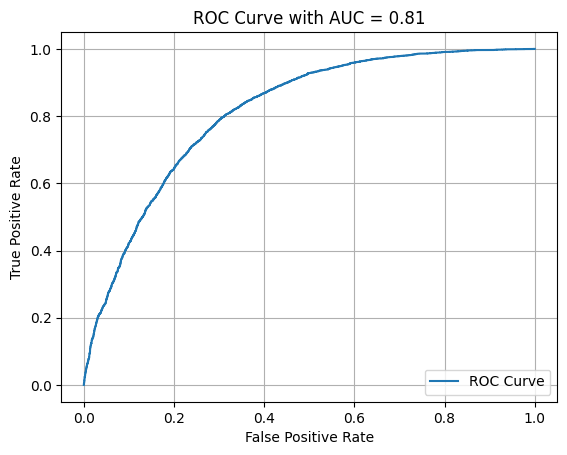

In [16]:

y_proba_test = best_rf.predict_proba(x_test4)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test4, y_proba_test)


plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test4, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## DECISION TREE CLASSIFIER

In [17]:

# Parametry do przetestowania w Grid Search
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'criterion': ['gini', 'entropy']
}

# Utworzenie modelu drzewa decyzyjnego
tree = DecisionTreeClassifier()

# Uruchomienie Grid Search z walidacją krzyżową
grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train4, y_train4)

# Wyświetlenie najlepszych parametrów i wyników
print("Najlepsze parametry:", grid_search.best_params_)
print("Najlepsza dokładność:", grid_search.best_score_)

# Utworzenie i ocena modelu z najlepszymi parametrami
best_tree = grid_search.best_estimator_
best_tree.fit(x_train4, y_train4)

ypred_train2 = best_tree.predict(x_train4)
ypred_test2 = best_tree.predict(x_test4)

# Ocena modelu na zbiorze testowym

print("Training Results\n")
print(classification_report(y_train4, ypred_train2))
print('Testing Results\n')
print(classification_report(y_test4, ypred_test2))

# Dodatkowo: Walidacja krzyżowa dla najlepszego modelu na całym zbiorze danych
# cross_val_scores = cross_val_score(best_tree, x_train4, y_train4, cv=5)
# print("Cross-Validation Scores for the Best Model:", cross_val_scores)
# print("Average Cross-Validation Score:", cross_val_scores.mean())

Najlepsze parametry: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2}
Najlepsza dokładność: 0.7135477706460417
Training Results

              precision    recall  f1-score   support

         0.0       0.79      0.70      0.74     16021
         1.0       0.73      0.81      0.77     16110

    accuracy                           0.75     32131
   macro avg       0.76      0.75      0.75     32131
weighted avg       0.76      0.75      0.75     32131

Testing Results

              precision    recall  f1-score   support

         0.0       0.75      0.67      0.70      5400
         1.0       0.69      0.77      0.73      5311

    accuracy                           0.72     10711
   macro avg       0.72      0.72      0.72     10711
weighted avg       0.72      0.72      0.72     10711



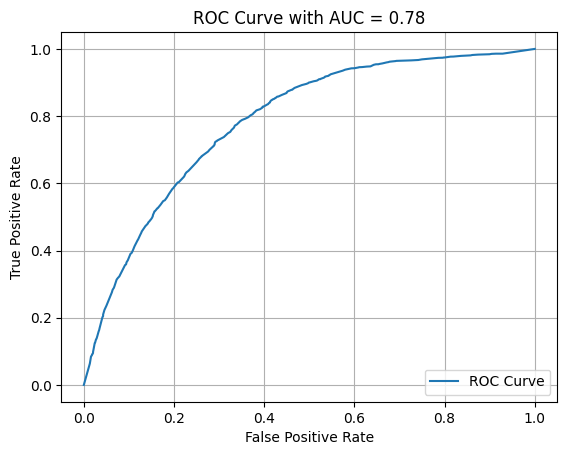

In [18]:

y_proba_test = best_tree.predict_proba(x_test4)[:, 1]


fpr, tpr, thresholds = roc_curve(y_test4, y_proba_test)


plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test4, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Naive Bayes

In [19]:
Gnb = GaussianNB()
Gnb.fit(x_train4, y_train4)
ypred_train3 = Gnb.predict(x_train4)
y_pred_test3 = Gnb.predict(x_test4)

print("Naive Bayes Classifier Accuracy: ",accuracy_score(y_test4, y_pred_test3))

Naive Bayes Classifier Accuracy:  0.7094575669872094


In [20]:
print("Training Results\n")
print(classification_report(y_train4, ypred_train3))
print('Testing Results\n')
print(classification_report(y_test4, y_pred_test3))

Training Results

              precision    recall  f1-score   support

         0.0       0.70      0.72      0.71     16021
         1.0       0.71      0.69      0.70     16110

    accuracy                           0.70     32131
   macro avg       0.70      0.70      0.70     32131
weighted avg       0.70      0.70      0.70     32131

Testing Results

              precision    recall  f1-score   support

         0.0       0.71      0.72      0.71      5400
         1.0       0.71      0.70      0.70      5311

    accuracy                           0.71     10711
   macro avg       0.71      0.71      0.71     10711
weighted avg       0.71      0.71      0.71     10711



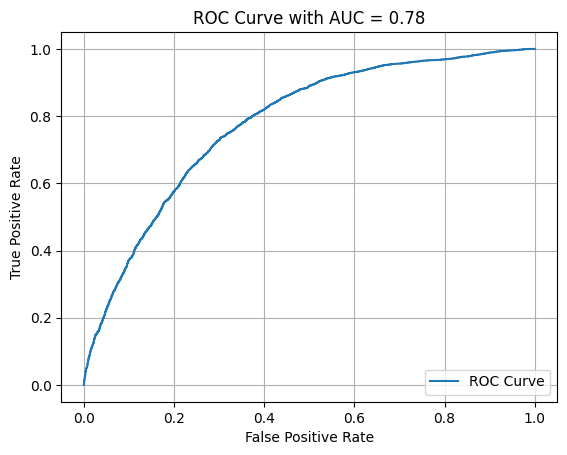

In [21]:
# cross_val_scores = cross_val_score(Gnb, x_train4, y_train4, cv=5)
# print("Cross-validation scores:", cross_val_scores)
# print("Average cross-validation score:", np.mean(cross_val_scores))
y_proba_test = Gnb.predict_proba(x_test4)[:, 1]


fpr, tpr, thresholds = roc_curve(y_test4, y_proba_test)


plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test4, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## XGBOSST


Najlepsze parametry:  {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50, 'subsample': 0.7}
Accuracy on Training set:  0.7488095608602284
Accuracy on Test set:  0.7460554570068154

Training Results

              precision    recall  f1-score   support

         0.0       0.78      0.69      0.73     16021
         1.0       0.73      0.80      0.76     16110

    accuracy                           0.75     32131
   macro avg       0.75      0.75      0.75     32131
weighted avg       0.75      0.75      0.75     32131

Testing Results

              precision    recall  f1-score   support

         0.0       0.78      0.70      0.73      5400
         1.0       0.72      0.80      0.76      5311

    accuracy                           0.75     10711
   macro avg       0.75      0.75      0.75     10711
weighted avg       0.75      0.75      0.75     10711



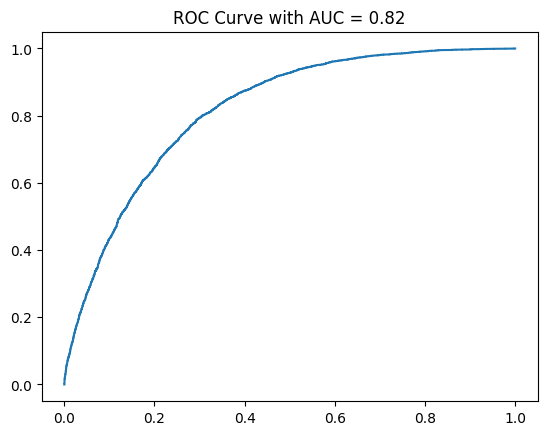

In [22]:
# Inicjalizacja modelu XGBoost
xg = XGBClassifier()

# Definiowanie siatki hiperparametrów do przetestowania
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# Utworzenie obiektu GridSearchCV
grid_search = GridSearchCV(estimator=xg, param_grid=param_grid, cv=3, scoring='accuracy')

# Przeszukiwanie siatki parametrów
grid_search.fit(x_train4, y_train4)

# Najlepsze parametry i najlepszy model
print("Najlepsze parametry: ", grid_search.best_params_)
best_xg = grid_search.best_estimator_

# Predykcje na zbiorze treningowym i testowym
ypred_train4 = best_xg.predict(x_train4)
y_pred_test4 = best_xg.predict(x_test4)

# Ocena modelu
print("Accuracy on Training set: ", accuracy_score(y_train4, ypred_train4))
print("Accuracy on Test set: ", accuracy_score(y_test4, y_pred_test4))
print("\nTraining Results\n")
print(classification_report(y_train4, ypred_train4))
print('Testing Results\n')
print(classification_report(y_test4, y_pred_test4))

# cross_val_scores = cross_val_score(best_xg, x_train4, y_train4, cv=5)
# print("Cross-validation scores:", cross_val_scores)
# print("Average cross-validation score:", np.mean(cross_val_scores))

# Krzywa ROC
y_proba_test4 = best_xg.predict_proba(x_test4)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test4, y_proba_test4)
plt.plot(fpr, tpr)
plt.title("ROC Curve with AUC = {:.2f}".format(roc_auc_score(y_test4, y_proba_test4)))
plt.show()

## logistic regression

Najlepsze parametry:  {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy on Training set:  0.7327814260371603
Accuracy on Test set:  0.7334515918214919

Training Results

              precision    recall  f1-score   support

         0.0       0.75      0.70      0.72     16021
         1.0       0.72      0.76      0.74     16110

    accuracy                           0.73     32131
   macro avg       0.73      0.73      0.73     32131
weighted avg       0.73      0.73      0.73     32131

Testing Results

              precision    recall  f1-score   support

         0.0       0.75      0.71      0.73      5400
         1.0       0.72      0.76      0.74      5311

    accuracy                           0.73     10711
   macro avg       0.73      0.73      0.73     10711
weighted avg       0.73      0.73      0.73     10711



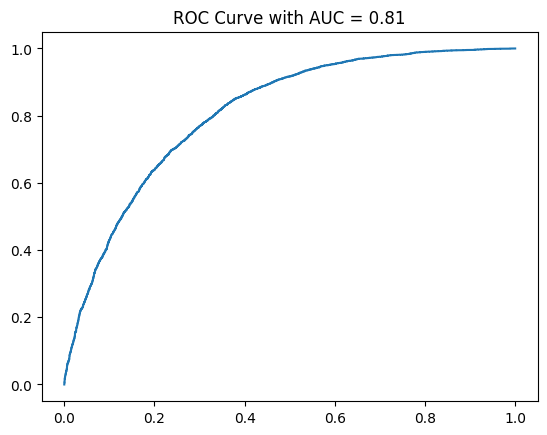

In [23]:
# Inicjalizacja modelu regresji logistycznej
lg = LogisticRegression()

# Definiowanie siatki hiperparametrów do przetestowania
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Parametr regularyzacji
    'penalty': ['l1', 'l2'],       # Typ regularyzacji
    'solver': ['liblinear']        # Algorytm optymalizacji (liblinear jest dobrym wyborem dla małych zbiorów danych)
}

# Utworzenie obiektu GridSearchCV
grid_search = GridSearchCV(estimator=lg, param_grid=param_grid, cv=5, scoring='accuracy')

# Przeszukiwanie siatki parametrów
grid_search.fit(x_train4, y_train4)

# Najlepsze parametry i najlepszy model
print("Najlepsze parametry: ", grid_search.best_params_)
best_lg = grid_search.best_estimator_

# Predykcje na zbiorze treningowym i testowym
ypred_train4 = best_lg.predict(x_train4)
y_pred_test4 = best_lg.predict(x_test4)

# Ocena modelu
print("Accuracy on Training set: ", accuracy_score(y_train4, ypred_train4))
print("Accuracy on Test set: ", accuracy_score(y_test4, y_pred_test4))
print("\nTraining Results\n")
print(classification_report(y_train4, ypred_train4))
print('Testing Results\n')
print(classification_report(y_test4, y_pred_test4))

# cross_val_scores = cross_val_score(best_lg, x_train4, y_train4, cv=5)
# print("Cross-validation scores:", cross_val_scores)
# print("Average cross-validation score:", np.mean(cross_val_scores))

# Krzywa ROC
y_proba_test4 = best_lg.predict_proba(x_test4)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test4, y_proba_test4)
plt.plot(fpr, tpr)
plt.title("ROC Curve with AUC = {:.2f}".format(roc_auc_score(y_test4, y_proba_test4)))
plt.show()

## GradientBoostingClassifier

In [24]:
# Inicjalizacja modelu Gradient Boosting Classifier
gb = GradientBoostingClassifier()

# Definiowanie siatki hiperparametrów do przetestowania
param_grid = {
    'n_estimators': [100, 200, 300],  # Liczba drzew w ensemble
    'learning_rate': [0.01, 0.1, 0.2], # Szybkość uczenia
    'max_depth': [3, 5, 7],            # Maksymalna głębokość drzewa
    'min_samples_split': [2, 4],       # Minimalna liczba próbek wymagana do podziału węzła
    'min_samples_leaf': [1, 2]         # Minimalna liczba próbek w liściu
}

# Utworzenie obiektu GridSearchCV
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, scoring='accuracy')

# Przeszukiwanie siatki parametrów
grid_search.fit(x_train4, y_train4)

# Najlepsze parametry i najlepszy model
print("Najlepsze parametry: ", grid_search.best_params_)
best_gb = grid_search.best_estimator_

# Predykcje na zbiorze treningowym i testowym
ypred_train6 = best_gb.predict(x_train4)
y_pred_test6 = best_gb.predict(x_test4)

# Ocena modelu
print("Accuracy on Training set: ", accuracy_score(y_train4, ypred_train6))
print("Accuracy on Test set: ", accuracy_score(y_test4, y_pred_test6))
print("\nTraining Results\n")
print(classification_report(y_train4, ypred_train6))
print('Testing Results\n')
print(classification_report(y_test4, y_pred_test6))

# cross_val_scores = cross_val_score(best_gb, x_train4, y_train4, cv=5)
# print("Cross-validation scores:", cross_val_scores)
# print("Average cross-validation score:", np.mean(cross_val_scores))

# Krzywa ROC
y_proba_test6 = best_gb.predict_proba(x_test4)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test4, y_proba_test6)
plt.plot(fpr, tpr)
plt.title("ROC Curve with AUC = {:.2f}".format(roc_auc_score(y_test4, y_proba_test6)))
plt.show()

KeyboardInterrupt: 

## KNN

In [25]:
knn = KNeighborsClassifier()
knn.fit(x_train4, y_train4)


KNeighborsClassifier()

In [26]:
grid_cv = GridSearchCV(KNeighborsClassifier(), 
                       param_grid={
                           "n_neighbors": range(1, 50)
                       }, cv=5, scoring="f1", 
                       verbose=1, n_jobs=6)


In [27]:
grid_cv.fit(x_train4, 
            y_train4)

Fitting 5 folds for each of 49 candidates, totalling 245 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=6,
             param_grid={'n_neighbors': range(1, 50)}, scoring='f1', verbose=1)

In [28]:
grid_cv.best_score_

0.7397215916860129

In [29]:
knn = grid_cv.best_estimator_
knn

KNeighborsClassifier(n_neighbors=37)

In [30]:
ypred_train7 = grid_cv.predict(x_train4)
y_pred_test7 = grid_cv.predict(x_test4)
print("XGBClassifier Accuracy: ",accuracy_score(y_test4, y_pred_test7))

XGBClassifier Accuracy:  0.7281299598543554


In [31]:
print("Training Results\n")
print(classification_report(y_train4, ypred_train7))
print("Testing Results\n")
print(classification_report(y_test4, y_pred_test7))

Training Results

              precision    recall  f1-score   support

         0.0       0.77      0.68      0.72     16021
         1.0       0.71      0.80      0.76     16110

    accuracy                           0.74     32131
   macro avg       0.74      0.74      0.74     32131
weighted avg       0.74      0.74      0.74     32131

Testing Results

              precision    recall  f1-score   support

         0.0       0.76      0.67      0.71      5400
         1.0       0.70      0.79      0.74      5311

    accuracy                           0.73     10711
   macro avg       0.73      0.73      0.73     10711
weighted avg       0.73      0.73      0.73     10711



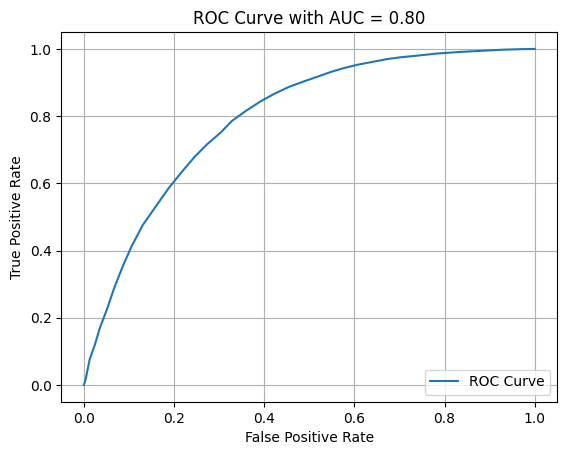

In [32]:
# cross_val_scores = cross_val_score(grid_cv, x_train4, y_train4, cv=5)
# print("Cross-validation scores:", cross_val_scores)
# print("Average cross-validation score:", np.mean(cross_val_scores))
y_proba_test = grid_cv.predict_proba(x_test4)[:, 1]


fpr, tpr, thresholds = roc_curve(y_test4, y_proba_test)


plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test4, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## SIECI NEURONOWE

## ANN

In [33]:
ann = tf.keras.models.Sequential()

In [34]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)


In [35]:
ann.add(tf.keras.layers.Dense(units=14, activation='relu'))

In [36]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [37]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [38]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [39]:
ann.fit(x_train4, y_train4, batch_size = 32, epochs=100,
          validation_data=(x_test4, y_test4), verbose=1,
          callbacks=[early_stop])

Epoch 1/100


1005/1005 [==============================] - 2s 2ms/step - loss: 0.5984 - accuracy: 0.6773 - val_loss: 0.5519 - val_accuracy: 0.7176
Epoch 2/100
1005/1005 [==============================] - 2s 2ms/step - loss: 0.5452 - accuracy: 0.7238 - val_loss: 0.5358 - val_accuracy: 0.7317
Epoch 3/100
1005/1005 [==============================] - 2s 2ms/step - loss: 0.5391 - accuracy: 0.7279 - val_loss: 0.5334 - val_accuracy: 0.7329
Epoch 4/100
1005/1005 [==============================] - 2s 2ms/step - loss: 0.5369 - accuracy: 0.7304 - val_loss: 0.5330 - val_accuracy: 0.7331
Epoch 5/100
1005/1005 [==============================] - 2s 2ms/step - loss: 0.5357 - accuracy: 0.7330 - val_loss: 0.5309 - val_accuracy: 0.7331
Epoch 6/100
1005/1005 [==============================] - 2s 2ms/step - loss: 0.5346 - accuracy: 0.7323 - val_loss: 0.5301 - val_accuracy: 0.7349
Epoch 7/100
1005/1005 [==============================] - 2s 2ms/step - loss: 0.5340 - accuracy: 0.7317 - val_loss: 0.5316 - val_

In [40]:
ypred_train8 = ann.predict(x_train4)
y_pred_test8 = ann.predict(x_test4)

y_pred_test8 = (y_pred_test8 > 0.5)
ypred_train8 = (ypred_train8 > 0.5)
print(np.concatenate((y_pred_test8.reshape(len(y_pred_test8),1), y_test4.reshape(len(y_test4),1)),1))

335/335 [==============================] - 0s 943us/step
[[1. 1.]
 [0. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 0.]
 [0. 0.]]


In [41]:
accuracy_score(y_test4, y_pred_test8)

0.7420408925403791

In [42]:
print("Training Results\n")
print(classification_report(y_train4, ypred_train8))
print('Testing Results\n')
print(classification_report(y_test4, y_pred_test8))

Training Results

              precision    recall  f1-score   support

         0.0       0.75      0.72      0.73     16021
         1.0       0.73      0.75      0.74     16110

    accuracy                           0.74     32131
   macro avg       0.74      0.74      0.74     32131
weighted avg       0.74      0.74      0.74     32131

Testing Results

              precision    recall  f1-score   support

         0.0       0.75      0.73      0.74      5400
         1.0       0.73      0.75      0.74      5311

    accuracy                           0.74     10711
   macro avg       0.74      0.74      0.74     10711
weighted avg       0.74      0.74      0.74     10711



  1/335 [..............................] - ETA: 8s

335/335 [==============================] - 0s 900us/step


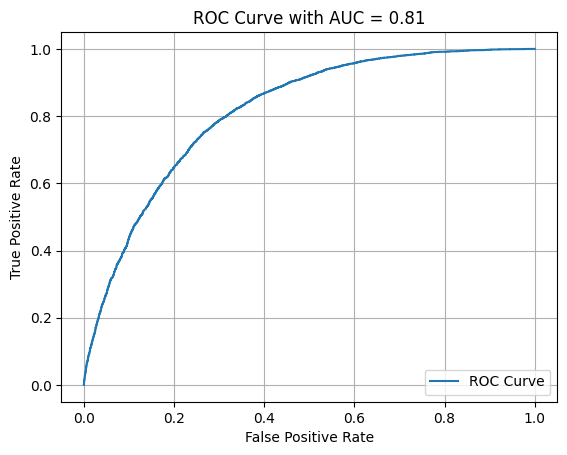

In [43]:
# cross_val_scores = cross_val_score(ann, x_train4, y_train4, cv=5)
# print("Cross-validation scores:", cross_val_scores)
# print("Average cross-validation score:", np.mean(cross_val_scores))
y_proba_test = ann.predict(x_test4).flatten()


fpr, tpr, thresholds = roc_curve(y_test4, y_proba_test)


plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test4, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## inna proba 

In [44]:

tf.random.set_seed(42)



model2 = tf.keras.Sequential([
  tf.keras.layers.Dense(18,activation = 'relu'),
  tf.keras.layers.Dense(36,activation = 'relu'),
  tf.keras.layers.Dense(18,activation = 'relu'),
  tf.keras.layers.Dense(9,activation = 'relu'),
  tf.keras.layers.Dense(1,activation = 'sigmoid')                            
])



model2.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics = ['accuracy'])


history_2 = model2.fit(x_train4,y_train4,epochs = 100)

Epoch 1/100
1005/1005 [==============================] - 2s 1ms/step - loss: 0.5624 - accuracy: 0.7089
Epoch 2/100
1005/1005 [==============================] - 1s 1ms/step - loss: 0.5379 - accuracy: 0.7287
Epoch 3/100
1005/1005 [==============================] - 1s 1ms/step - loss: 0.5352 - accuracy: 0.7313
Epoch 4/100
1005/1005 [==============================] - 1s 1ms/step - loss: 0.5335 - accuracy: 0.7313
Epoch 5/100
1005/1005 [==============================] - 1s 1ms/step - loss: 0.5320 - accuracy: 0.7340
Epoch 6/100
1005/1005 [==============================] - 1s 1ms/step - loss: 0.5305 - accuracy: 0.7353
Epoch 7/100
1005/1005 [==============================] - 1s 1ms/step - loss: 0.5306 - accuracy: 0.7351
Epoch 8/100
1005/1005 [==============================] - 1s 1ms/step - loss: 0.5294 - accuracy: 0.7365
Epoch 9/100
1005/1005 [==============================] - 1s 1ms/step - loss: 0.5291 - accuracy: 0.7361
Epoch 10/100
1005/1005 [==============================] - 1s 1ms/step - l

In [45]:
model2.evaluate(x_test4,y_test4)

335/335 [==============================] - 0s 825us/step - loss: 0.5333 - accuracy: 0.7348


[0.5332544445991516, 0.7347586750984192]

In [46]:
ypred_train22 = model2.predict(x_train4)
y_pred_test22 = model2.predict(x_test4)

y_pred_test22 = (y_pred_test22 > 0.5)
ypred_train22 = (ypred_train22 > 0.5)
print("Training Results\n")
print(classification_report(y_train4,ypred_train22))
print("Testing Results\n")
print(classification_report(y_test4,y_pred_test22))

335/335 [==============================] - 0s 771us/step
Training Results

              precision    recall  f1-score   support

         0.0       0.78      0.70      0.74     16021
         1.0       0.73      0.81      0.77     16110

    accuracy                           0.75     32131
   macro avg       0.76      0.75      0.75     32131
weighted avg       0.76      0.75      0.75     32131

Testing Results

              precision    recall  f1-score   support

         0.0       0.76      0.69      0.72      5400
         1.0       0.71      0.78      0.75      5311

    accuracy                           0.73     10711
   macro avg       0.74      0.74      0.73     10711
weighted avg       0.74      0.73      0.73     10711



335/335 [==============================] - 0s 809us/step


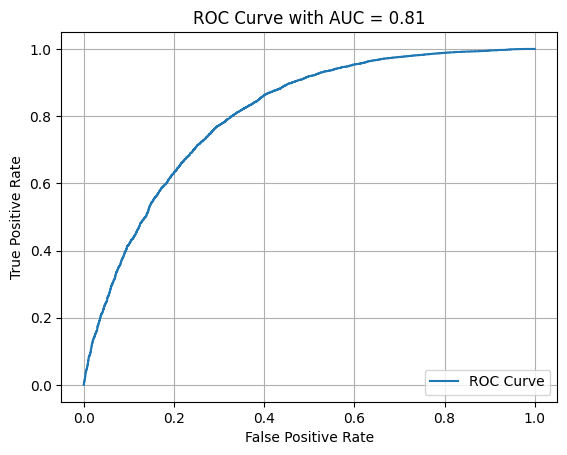

In [47]:
# cross_val_scores = cross_val_score(model_22, x_train4, y_train4, cv=5)
# print("Cross-validation scores:", cross_val_scores)
# print("Average cross-validation score:", np.mean(cross_val_scores))
y_proba_test = model2.predict(x_test4).flatten()


fpr, tpr, thresholds = roc_curve(y_test4, y_proba_test)


plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test4, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## inne próby sieci neuronowych 

In [48]:


tf.random.set_seed(42)


model3 = tf.keras.Sequential([
  tf.keras.layers.Dense(14,activation = 'relu'),
  tf.keras.layers.Dense(6,activation = 'relu'),
  tf.keras.layers.Dense(6,activation = 'relu'),
  tf.keras.layers.Dense(1,activation = 'sigmoid')                            
])


model3.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics = ['accuracy'])


history_2 = model3.fit(x_train4,y_train4,epochs = 100)

Epoch 1/100
1005/1005 [==============================] - 2s 1ms/step - loss: 0.5975 - accuracy: 0.6761
Epoch 2/100
1005/1005 [==============================] - 1s 974us/step - loss: 0.5411 - accuracy: 0.7275
Epoch 3/100
1005/1005 [==============================] - 1s 982us/step - loss: 0.5376 - accuracy: 0.7298
Epoch 4/100
1005/1005 [==============================] - 1s 1ms/step - loss: 0.5361 - accuracy: 0.7312
Epoch 5/100
1005/1005 [==============================] - 1s 1ms/step - loss: 0.5347 - accuracy: 0.7300
Epoch 6/100
1005/1005 [==============================] - 1s 1ms/step - loss: 0.5342 - accuracy: 0.7317
Epoch 7/100
1005/1005 [==============================] - 1s 1ms/step - loss: 0.5342 - accuracy: 0.7332
Epoch 8/100
1005/1005 [==============================] - 1s 1ms/step - loss: 0.5333 - accuracy: 0.7337
Epoch 9/100
1005/1005 [==============================] - 1s 1ms/step - loss: 0.5332 - accuracy: 0.7334
Epoch 10/100
1005/1005 [==============================] - 1s 1ms/step

In [49]:
model3.evaluate(x_test4,y_test4)

335/335 [==============================] - 0s 813us/step - loss: 0.5214 - accuracy: 0.7426


[0.52142733335495, 0.7426010370254517]

In [50]:
ypred_train11 = model3.predict(x_train4)
y_pred_test11 = model3.predict(x_test4)

y_pred_test11 = (y_pred_test11 > 0.5)
ypred_train11 = (ypred_train11 > 0.5)
print("Training Results\n")
print(classification_report(y_train4,ypred_train11))
print("Testing Results\n")
print(classification_report(y_test4,y_pred_test11))

335/335 [==============================] - 0s 731us/step
Training Results

              precision    recall  f1-score   support

         0.0       0.78      0.67      0.72     16021
         1.0       0.71      0.81      0.76     16110

    accuracy                           0.74     32131
   macro avg       0.75      0.74      0.74     32131
weighted avg       0.75      0.74      0.74     32131

Testing Results

              precision    recall  f1-score   support

         0.0       0.78      0.68      0.73      5400
         1.0       0.71      0.81      0.76      5311

    accuracy                           0.74     10711
   macro avg       0.75      0.74      0.74     10711
weighted avg       0.75      0.74      0.74     10711



335/335 [==============================] - 0s 743us/step


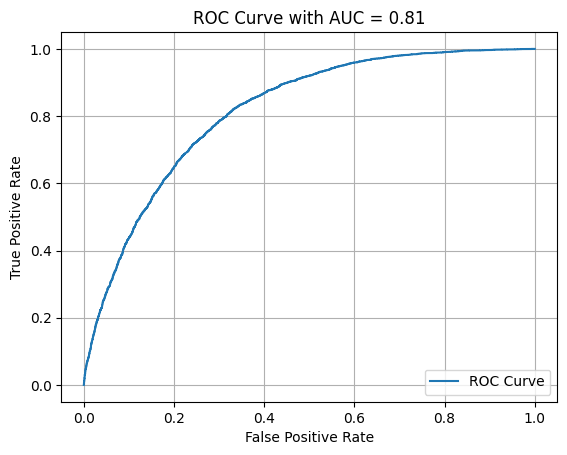

In [51]:
# cross_val_scores = cross_val_score(model_2, x_train4, y_train4, cv=5)
# print("Cross-validation scores:", cross_val_scores)
# print("Average cross-validation score:", np.mean(cross_val_scores))

y_proba_test = model3.predict(x_test4).flatten()


fpr, tpr, thresholds = roc_curve(y_test4, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test4, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## inne próby sieci neuronowych 

In [52]:
model4 = Sequential()
model4.add(Dense(units=30,activation='relu'))
model4.add(Dropout(0.5))

model4.add(Dense(units=15,activation='relu'))
model4.add(Dropout(0.5))

model4.add(Dense(units=1,activation='sigmoid'))
model4.compile(loss='binary_crossentropy', optimizer='adam')

In [53]:
model4.fit(x=x_train4, 
          y=y_train4, 
          epochs=100,
          validation_data=(x_test4, y_test4), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/100
1005/1005 [==============================] - 2s 1ms/step - loss: 0.6567 - val_loss: 0.5853
Epoch 2/100
1005/1005 [==============================] - 1s 1ms/step - loss: 0.5999 - val_loss: 0.5566
Epoch 3/100
1005/1005 [==============================] - 1s 1ms/step - loss: 0.5870 - val_loss: 0.5501
Epoch 4/100
1005/1005 [==============================] - 1s 1ms/step - loss: 0.5757 - val_loss: 0.5443
Epoch 5/100
1005/1005 [==============================] - 1s 1ms/step - loss: 0.5711 - val_loss: 0.5440
Epoch 6/100
1005/1005 [==============================] - 1s 1ms/step - loss: 0.5678 - val_loss: 0.5340
Epoch 7/100
1005/1005 [==============================] - 1s 1ms/step - loss: 0.5679 - val_loss: 0.5377
Epoch 8/100
1005/1005 [==============================] - 1s 1ms/step - loss: 0.5640 - val_loss: 0.5347
Epoch 9/100
1005/1005 [==============================] - 1s 1ms/step - loss: 0.5626 - val_loss: 0.5353
Epoch 10/100
1005/1005 [==============================] - 1s 1ms/step - l

In [54]:
ypred_train12 = model4.predict(x_train4)
y_pred_test12 = model4.predict(x_test4)

y_pred_test12 = (y_pred_test12 > 0.5)
ypred_train12 = (ypred_train12 > 0.5)
print("Training Results\n")
print(classification_report(y_train4,ypred_train12))
print("Testing Results\n")
print(classification_report(y_test4,y_pred_test12))

335/335 [==============================] - 0s 886us/step
Training Results

              precision    recall  f1-score   support

         0.0       0.76      0.71      0.73     16021
         1.0       0.73      0.77      0.75     16110

    accuracy                           0.74     32131
   macro avg       0.74      0.74      0.74     32131
weighted avg       0.74      0.74      0.74     32131

Testing Results

              precision    recall  f1-score   support

         0.0       0.76      0.71      0.73      5400
         1.0       0.72      0.77      0.75      5311

    accuracy                           0.74     10711
   macro avg       0.74      0.74      0.74     10711
weighted avg       0.74      0.74      0.74     10711



335/335 [==============================] - 0s 1ms/step


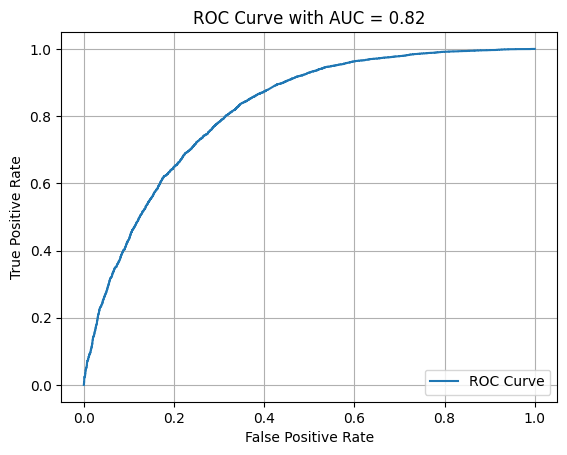

In [55]:
# cross_val_scores = cross_val_score(model1, x_train4, y_train4, cv=5)
# print("Cross-validation scores:", cross_val_scores)
# print("Average cross-validation score:", np.mean(cross_val_scores))
y_proba_test = model4.predict(x_test4).flatten()

fpr, tpr, thresholds = roc_curve(y_test4, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test4, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## inny model

In [56]:
model5 = Sequential()


model5.add(Dense(14,  activation='relu'))
model5.add(Dropout(0.2))


model5.add(Dense(10, activation='relu'))
model5.add(Dropout(0.2))


model5.add(Dense(units=1,activation='sigmoid'))


model5.compile(loss='binary_crossentropy', optimizer='adam')

In [57]:
model5.fit(x=x_train4, 
          y=y_train4, 
          epochs=100,
          validation_data=(x_test4, y_test4), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/100
1005/1005 [==============================] - 2s 2ms/step - loss: 0.6334 - val_loss: 0.5682
Epoch 2/100
1005/1005 [==============================] - 1s 1ms/step - loss: 0.5756 - val_loss: 0.5470
Epoch 3/100
1005/1005 [==============================] - 2s 2ms/step - loss: 0.5643 - val_loss: 0.5425
Epoch 4/100
1005/1005 [==============================] - 2s 2ms/step - loss: 0.5578 - val_loss: 0.5419
Epoch 5/100
1005/1005 [==============================] - 2s 2ms/step - loss: 0.5530 - val_loss: 0.5407
Epoch 6/100
1005/1005 [==============================] - 1s 1ms/step - loss: 0.5511 - val_loss: 0.5353
Epoch 7/100
1005/1005 [==============================] - 1s 1ms/step - loss: 0.5511 - val_loss: 0.5380
Epoch 8/100
1005/1005 [==============================] - 1s 1ms/step - loss: 0.5502 - val_loss: 0.5347
Epoch 9/100
1005/1005 [==============================] - 1s 1ms/step - loss: 0.5464 - val_loss: 0.5377
Epoch 10/100
1005/1005 [==============================] - 1s 1ms/step - l

In [58]:
ypred_train13 = model5.predict(x_train4)
y_pred_test13 = model5.predict(x_test4)

y_pred_test13 = (y_pred_test13 > 0.5)
ypred_train13 = (ypred_train13 > 0.5)

print("Training Results\n")
print(classification_report(y_train4,ypred_train13))
print("Testing Results\n")
print(classification_report(y_test4,y_pred_test13))

335/335 [==============================] - 0s 830us/step
Training Results

              precision    recall  f1-score   support

         0.0       0.77      0.69      0.73     16021
         1.0       0.72      0.80      0.76     16110

    accuracy                           0.74     32131
   macro avg       0.75      0.74      0.74     32131
weighted avg       0.75      0.74      0.74     32131

Testing Results

              precision    recall  f1-score   support

         0.0       0.77      0.69      0.73      5400
         1.0       0.71      0.80      0.75      5311

    accuracy                           0.74     10711
   macro avg       0.74      0.74      0.74     10711
weighted avg       0.74      0.74      0.74     10711



335/335 [==============================] - 0s 852us/step


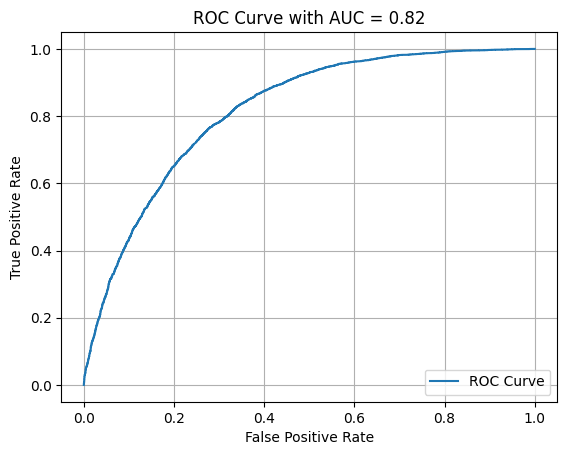

In [59]:
# cross_val_scores = cross_val_score(model2, x_train4, y_train4, cv=5)
# print("Cross-validation scores:", cross_val_scores)
# print("Average cross-validation score:", np.mean(cross_val_scores))
y_proba_test = model5.predict(x_test4).flatten()


fpr, tpr, thresholds = roc_curve(y_test4, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test4, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## SVC

In [60]:
model3 = SVC(probability=True)

In [61]:
model3.fit(x_train4,y_train4)

SVC(probability=True)

In [62]:
ypred_train14 = model3.predict(x_train4)
y_pred_test14 = model3.predict(x_test4)

print("Training Results\n")
print(classification_report(y_train4,ypred_train14))
print("Testing Results\n")
print(classification_report(y_test4,y_pred_test14))

Training Results

              precision    recall  f1-score   support

         0.0       0.78      0.67      0.72     16021
         1.0       0.71      0.81      0.76     16110

    accuracy                           0.74     32131
   macro avg       0.74      0.74      0.74     32131
weighted avg       0.74      0.74      0.74     32131

Testing Results

              precision    recall  f1-score   support

         0.0       0.77      0.67      0.72      5400
         1.0       0.70      0.80      0.75      5311

    accuracy                           0.73     10711
   macro avg       0.74      0.73      0.73     10711
weighted avg       0.74      0.73      0.73     10711



In [63]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [64]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [65]:
grid.fit(x_train4,y_train4)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.726 total time=  26.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.738 total time=  26.2s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.728 total time=  26.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.727 total time=  25.7s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.730 total time=  17.8s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.727 total time=  18.6s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.738 total time=  18.4s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.730 total time=  24.5s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.734 total time=  25.2s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.732 total time=  25.6s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.719 total time=  27.9s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

KeyboardInterrupt: 

In [ ]:
grid.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [ ]:
grid.best_estimator_

SVC(C=10, gamma=0.1)

In [ ]:
ypred_train = grid.predict(x_train4)
y_pred_test = grid.predict(x_test4)


print(classification_report(y_train4,ypred_train))
print(classification_report(y_test4,y_pred_test))

              precision    recall  f1-score   support

         0.0       0.77      0.67      0.72     16021
         1.0       0.71      0.80      0.76     16110

    accuracy                           0.74     32131
   macro avg       0.74      0.74      0.74     32131
weighted avg       0.74      0.74      0.74     32131

              precision    recall  f1-score   support

         0.0       0.77      0.67      0.72      5400
         1.0       0.71      0.80      0.75      5311

    accuracy                           0.74     10711
   macro avg       0.74      0.74      0.74     10711
weighted avg       0.74      0.74      0.74     10711



Training Results

              precision    recall  f1-score   support

         0.0       0.77      0.67      0.72     16021
         1.0       0.71      0.80      0.76     16110

    accuracy                           0.74     32131
   macro avg       0.74      0.74      0.74     32131
weighted avg       0.74      0.74      0.74     32131

Testing Results

              precision    recall  f1-score   support

         0.0       0.77      0.67      0.72      5400
         1.0       0.71      0.80      0.75      5311

    accuracy                           0.74     10711
   macro avg       0.74      0.74      0.74     10711
weighted avg       0.74      0.74      0.74     10711



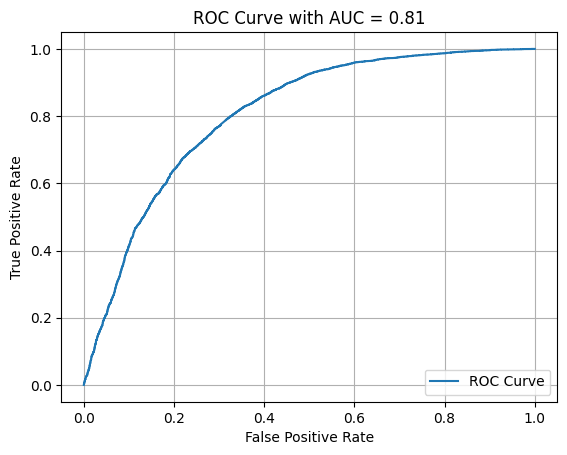

In [66]:
model3 = SVC(C=10, gamma=0.1, kernel='rbf', probability=True)
model3.fit(x_train4, y_train4)


ypred_train14 = model3.predict(x_train4)
y_pred_test14 = model3.predict(x_test4)


print("Training Results\n")
print(classification_report(y_train4, ypred_train14))
print("Testing Results\n")
print(classification_report(y_test4, y_pred_test14))

# cross_val_scores = cross_val_score(model3, x_train4, y_train4, cv=5)
# print("Cross-validation scores:", cross_val_scores)
# print("Average cross-validation score:", np.mean(cross_val_scores))

y_proba_test = model3.predict_proba(x_test4)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test4, y_proba_test)
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test4, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()